<a href="https://colab.research.google.com/github/asrianda/latAlgoritma/blob/main/Algo_A5_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df=pd.read_csv('Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [11]:
df=pd.read_csv('Customers.csv')
# Bersihkan nama kolom:
# - Hapus spasi, underscore, simbol $, dan isi dalam tanda kurung termasuk kurungnya
df.columns = df.columns.str.replace(r'\s+', '', regex=True)\
                       .str.replace(r'_', '', regex=True)\
                       .str.replace(r'\$', '', regex=True)\
                       .str.replace(r'\([^)]*\)', '', regex=True)
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [9]:
#-- pilih fitur numerik yang relevan. --
fiture=['Age','AnnualIncome','SpendingScore']
X=df[fiture]
X.head()

,Age,AnnualIncome,SpendingScore
0,19,15000,39
1,21,35000,81
2,20,86000,6
3,23,59000,77
4,31,38000,40


In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [14]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-1.05408932, -2.09350095, -0.42833854],
       [-0.98372287, -1.65613312,  1.07554599],
       [-1.0189061 , -0.54084515, -1.6099621 ],
       ...,
       [ 1.33836975, -0.43235606, -1.3235079 ],
       [ 0.98653753,  1.56090408, -1.68157565],
       [ 1.44391941, -0.00266404,  0.03714953]])

In [26]:
kmean=KMeans(n_clusters=3, random_state=42,n_init='auto')
df['Cluster']=kmean.fit_predict(X)
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize,Cluster
0,1,Male,19,15000,39,Healthcare,1,4,2
1,2,Male,21,35000,81,Engineer,3,3,2
2,3,Female,20,86000,6,Engineer,1,1,1
3,4,Female,23,59000,77,Lawyer,0,2,2
4,5,Female,31,38000,40,Entertainment,2,6,2


In [29]:
kmean1=KMeans(n_clusters=3, random_state=42,n_init='auto')
df['Cluster']=kmean.fit_predict(X_scaled)
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize,Cluster
0,1,Male,19,15000,39,Healthcare,1,4,2
1,2,Male,21,35000,81,Engineer,3,3,2
2,3,Female,20,86000,6,Engineer,1,1,2
3,4,Female,23,59000,77,Lawyer,0,2,2
4,5,Female,31,38000,40,Entertainment,2,6,2


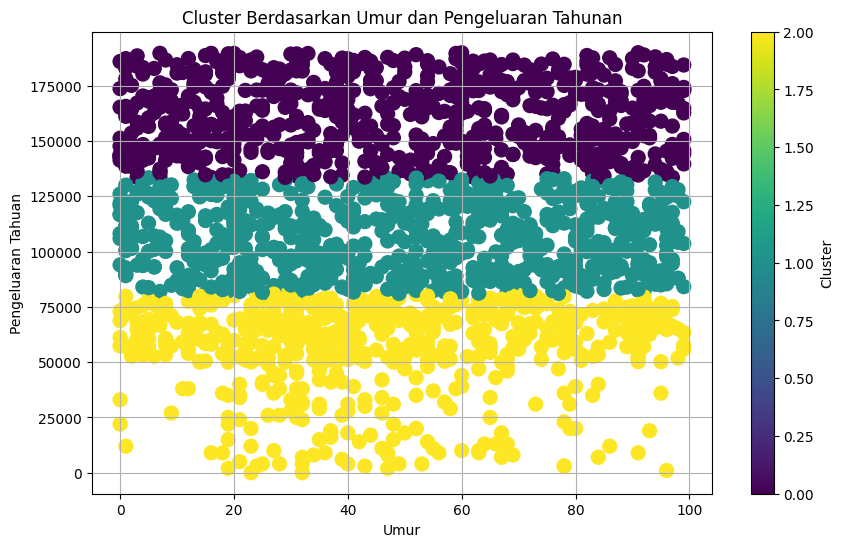

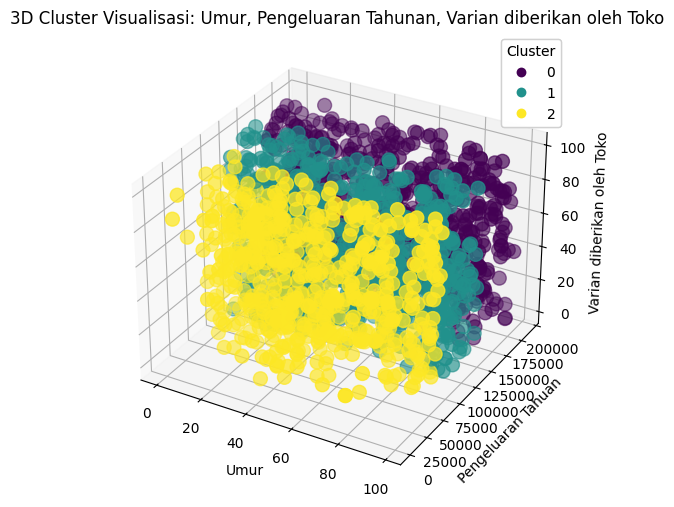

In [27]:
from mpl_toolkits.mplot3d import Axes3D

# 2D Scatter Plot (Pendapatan vs Pengeluaran)
plt.figure(figsize=(10,6))
plt.scatter(df['Age'], df['AnnualIncome'], c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Umur')
plt.ylabel('Pengeluaran Tahuan')
plt.title('Cluster Berdasarkan Umur dan Pengeluaran Tahunan')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

# 3D Scatter Plot (Age, AnnualIncome dan SpendingScore)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Age'], df['AnnualIncome'], df['SpendingScore'],
                     c=df['Cluster'], cmap='viridis', s=100)
ax.set_xlabel('Umur')
ax.set_ylabel('Pengeluaran Tahuan')
ax.set_zlabel('Varian diberikan oleh Toko')
ax.set_title('3D Cluster Visualisasi: Umur, Pengeluaran Tahunan, Varian diberikan oleh Toko')

legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)
plt.show()

Grafik K-Means Fit X_Sclead

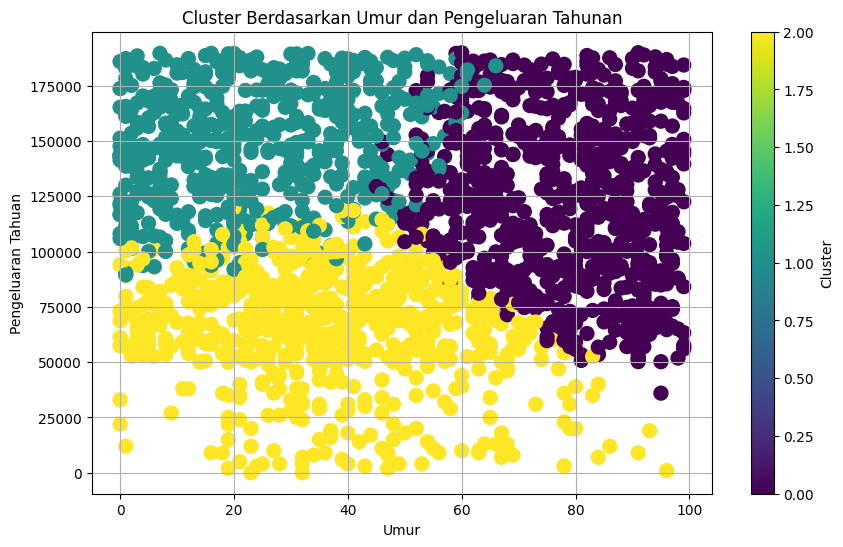

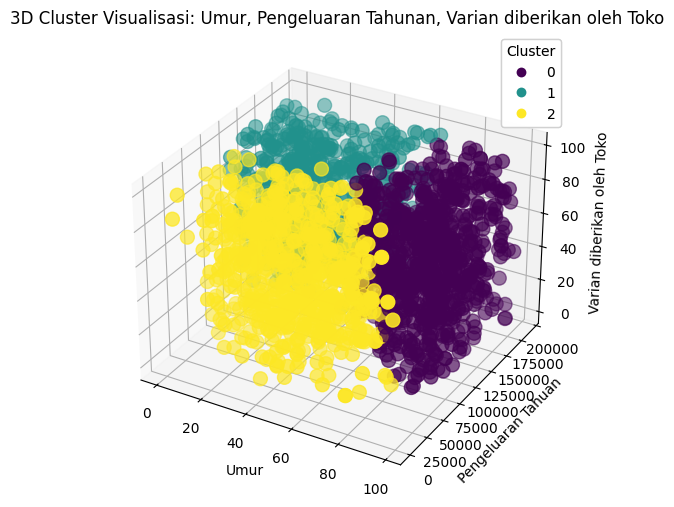

In [30]:
from mpl_toolkits.mplot3d import Axes3D

# 2D Scatter Plot (Pendapatan vs Pengeluaran)
plt.figure(figsize=(10,6))
plt.scatter(df['Age'], df['AnnualIncome'], c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Umur')
plt.ylabel('Pengeluaran Tahuan')
plt.title('Cluster Berdasarkan Umur dan Pengeluaran Tahunan')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

# 3D Scatter Plot (Age, AnnualIncome dan SpendingScore)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Age'], df['AnnualIncome'], df['SpendingScore'],
                     c=df['Cluster'], cmap='viridis', s=100)
ax.set_xlabel('Umur')
ax.set_ylabel('Pengeluaran Tahuan')
ax.set_zlabel('Varian diberikan oleh Toko')
ax.set_title('3D Cluster Visualisasi: Umur, Pengeluaran Tahunan, Varian diberikan oleh Toko')

legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)
plt.show()